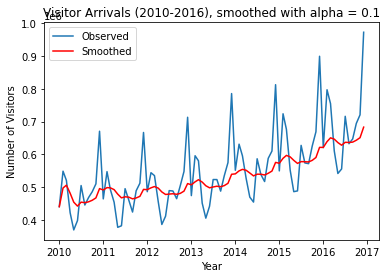

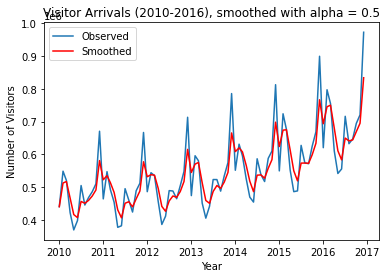

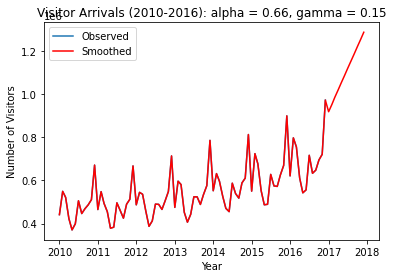

In [3]:
# -*- coding: utf-8 -*-
"""

@author: University of Sydney Business School
         Discipline of Business Analytics
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import holtwinters as ht
import datetime as dt

 
# Load the SP500 dataset;  
visitors = pd.read_csv('AustralianVisitors.csv')

# The closing price is in coulumn five, we fetch it by making it as a pandas Series
numVisitors = visitors[visitors.columns[1]]
numVisitors = numVisitors[228:]    # Look at the numbers between Jan 2010 and Dec 2016
months = visitors[visitors.columns[0]]
months = months[228:]

# We are going to do simple exponential smoothing
# In pandas simple exponential smoothing method is implemented for pandas Series
# Let do it for four different values of alpha
smoothed_1 = numVisitors.ewm(alpha = 0.1).mean()
smoothed_2 = numVisitors.ewm(alpha = 0.5).mean()

# Product time for plotting purpose
x = np.array([dt.datetime.strptime(d, '%b-%Y') for d in months]) 
# Prediction Year
xp = np.array([dt.datetime.strptime(d, '%b-%Y') for d in ('Jan-2017','Feb-2017',
    'Mar-2017','Apr-2017','May-2017','Jun-2017','Jul-2017','Aug-2017','Sep-2017',
    'Oct-2017','Nov-2017','Dec-2017')]) 
xp = np.hstack((x,xp))

#preparing the first figure
fig1 = plt.figure()
plt.plot(x,numVisitors, label='Observed')
plt.plot(x,smoothed_1, '-r', label='Smoothed')
plt.title('Visitor Arrivals (2010-2016), smoothed with alpha = 0.1') 
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.legend(loc=2) 

#preparing the second figure
fig2 = plt.figure()
plt.plot(x,numVisitors, label='Observed')
plt.plot(x,smoothed_2, '-r', label='Smoothed')
plt.title('Visitor Arrivals (2010-2016), smoothed with alpha = 0.5') 
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.legend(loc=2) 

# Now we try to use the trend corrected exponential smoothing which is also known 
# the Holt's linear exponential smoothing  
# Unfortunately pandas does not implement this smoothing method.  Here we are going 
# to use a third party's implementation, which is the linear method in holtwinters.py

# Preparing data
# numVisitors is a pandas Series. As holtwinters.py only accepts a list 
# variable, we need convert a Series to a python list
ts = numVisitors.tolist()

# Now we define how many predictions we wish to predict
fc = 12   # One year forecasting

# Let us try the Holt's linear exponential smoothing
t_smoothed, alpha, gamma, rmse = ht.linear(ts, fc)
# alpha, beta are the optimal parameter values found by the program
# rmse is the RMSE of the one-step prediction

#preparing the second figure
fig3 = plt.figure()
plt.plot(x,ts, label='Observed')
plt.plot(xp,t_smoothed, '-r', label='Smoothed')
plt.title('Visitor Arrivals (2010-2016): alpha = ' + str(np.round(alpha,2)) + ', gamma = ' + str(np.round(gamma,2))) 
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.legend(loc=2)  

plt.show()